Task 2
Task: Customer Preference Analysis

1] Analyze the relationship between the type ofcuisine and the restaurant's rating.

2] Identify the most popular cuisines amongcustomers based on the number of votes.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df= pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Prithviraj\internship\Internship\Restaurant.csv")

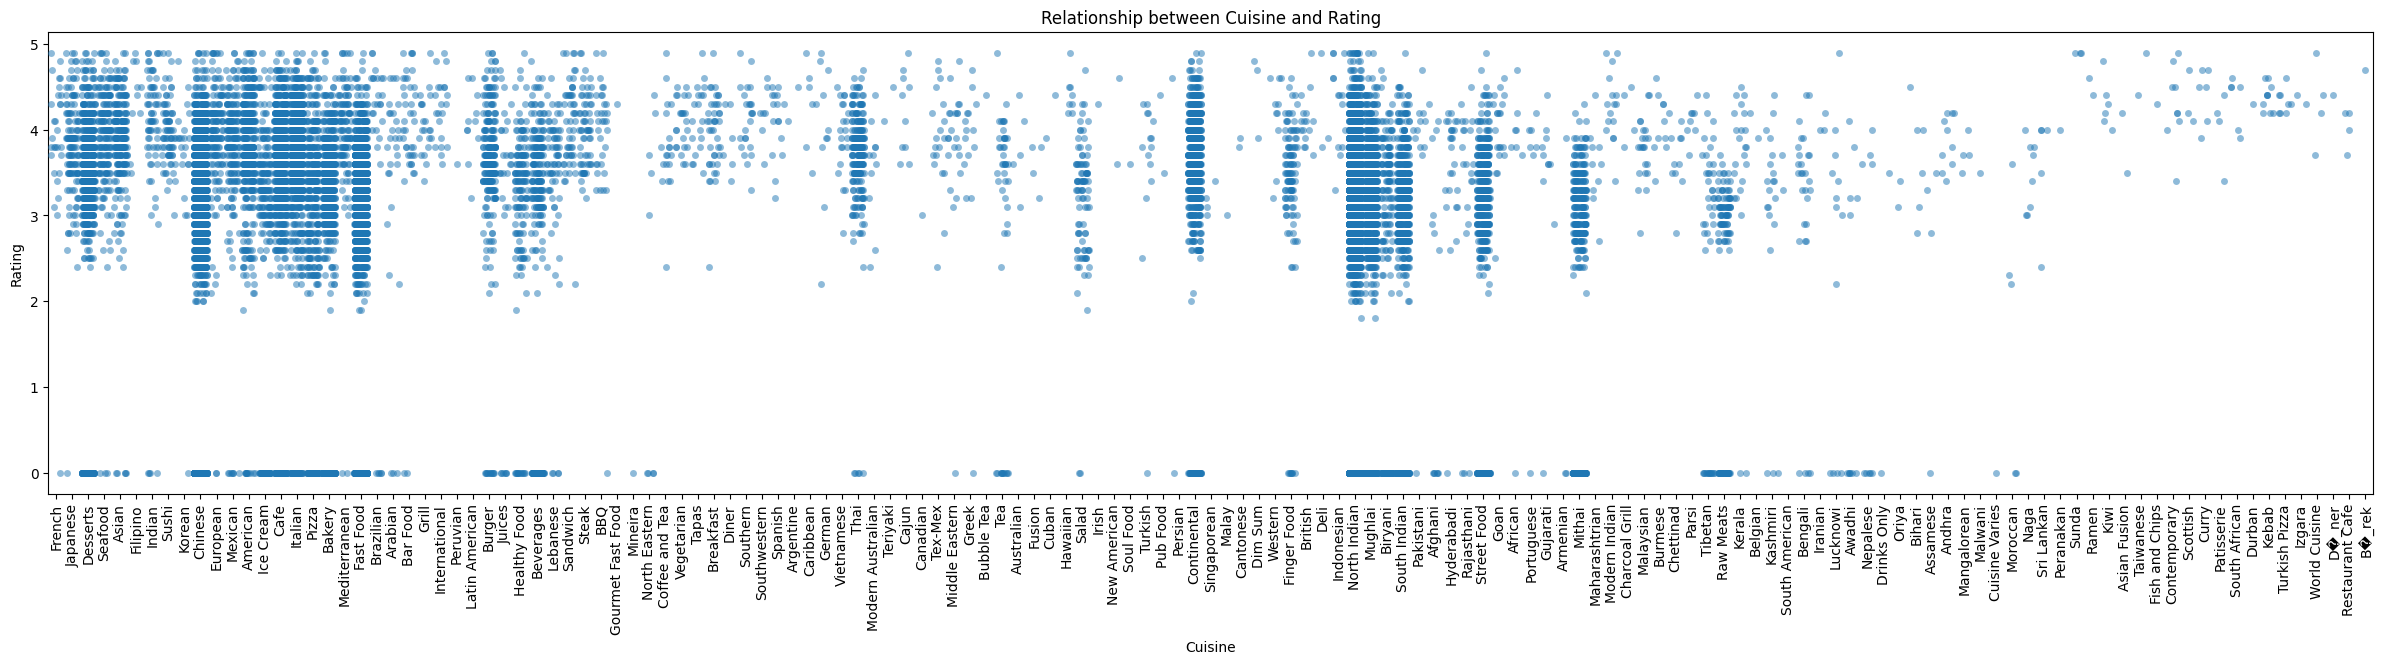

In [7]:
cuisine_series = df['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
cuisine_ratings_df = pd.DataFrame({'Cuisine': cuisine_series.values})
cuisine_ratings_df['Rating'] = df.loc[cuisine_series.index]['Aggregate rating'].values

plt.figure(figsize=(30, 6))
sns.stripplot(x='Cuisine', y='Rating', data=cuisine_ratings_df, jitter=0.4, alpha=0.5)
plt.title('Relationship between Cuisine and Rating')
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

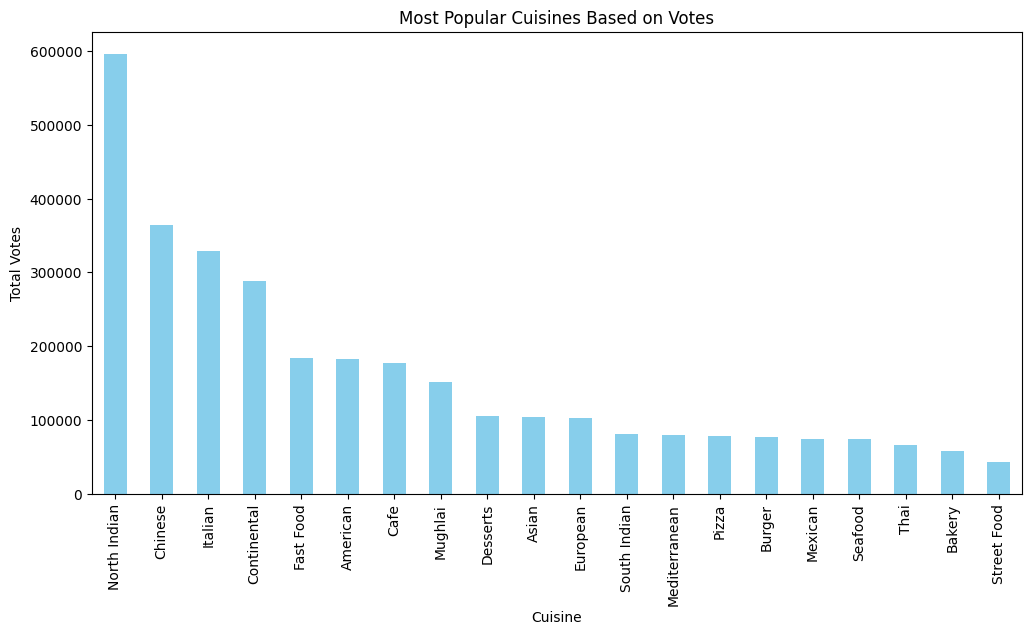

In [6]:
cuisine_series = df['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
cuisine_votes_df = pd.DataFrame({'Cuisine': cuisine_series.values})
cuisine_votes_df['Votes'] = df.loc[cuisine_series.index]['Votes'].values
total_votes_per_cuisine = cuisine_votes_df.groupby('Cuisine')['Votes'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
total_votes_per_cuisine.head(20).plot(kind='bar', color='skyblue')
plt.title('Most Popular Cuisines Based on Votes')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.show()